**Airbnb Calendar -Time-Series Analysis**

# Introduction



## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [22]:
#Read in libraries
import fbprophet
from fbprophet.plot import plot_plotly

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**

In [23]:
#Set path to local machine for data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed/'

#Read in Airbnb Calendar listings data
bookings_df = pd.read_csv(path + '2020_0417_Booked_Listings.csv', sep = ',',dtype = {'available' : 'category'},
                       low_memory=True,index_col=0)

#Read in Airbnb Calendar prices data
income_df = pd.read_csv(path + '2020_0417_Daily_Net_Rental_Income.csv', sep = ',',dtype = {'available' : 'category'},
                       low_memory=True,index_col=0)

**Set notebook preferences**

In [24]:
#Supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###Set plot aesthetics for notebook###
#Style
plt.style.use('Solarize_Light2')

#Title dictionary
title_dict = {'fontsize':16,
             'fontweight': 'bold'}
#Label dictionary
label_dict = {'fontsize':12,
             'fontweight': 'bold'}

# Data Overview

## Preview Airbnb Booked Listings Data

In [25]:
#Preview listings data
display(bookings_df.head())

,count
date,
2018-10-03,5897
2018-10-04,5806
2018-10-05,5847
2018-10-06,5822
2018-10-07,5493


## Data Information

In [26]:
#View listings info
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 2018-10-03 to 2020-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   546 non-null    int64
dtypes: int64(1)
memory usage: 8.5+ KB


In [27]:
#Describe listings_df
bookings_df.describe()

,count
count,546.000000
mean,15480.673993
std,6326.237135
min,3978.000000
25%,10409.250000
50%,17639.000000
75%,20689.500000
max,25479.000000


**About the variables**

* date
* available 
* count

## Preview Airbnb Calendar Price Data

In [28]:
#Preview prices data
display(income_df.head())

,net_income
date,
2019-01-09,1322563.0
2019-01-10,1111389.0
2019-01-11,1062798.0
2019-01-12,1060895.0
2019-01-13,1008958.0


## Data Information

In [29]:
#View calendar info
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 2019-01-09 to 2020-03-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   net_income  448 non-null    float64
dtypes: float64(1)
memory usage: 7.0+ KB


In [30]:
income_df.describe()

,net_income
count,4.480000e+02
mean,3.263110e+06
std,1.312005e+06
min,8.697280e+05
25%,2.045759e+06
50%,3.570038e+06
75%,4.354748e+06
max,5.783902e+06


**About the variables**

* date
* available 
* count

# Time Series Analysis - Bookings Count

## Quick Exploratory Data Analysis

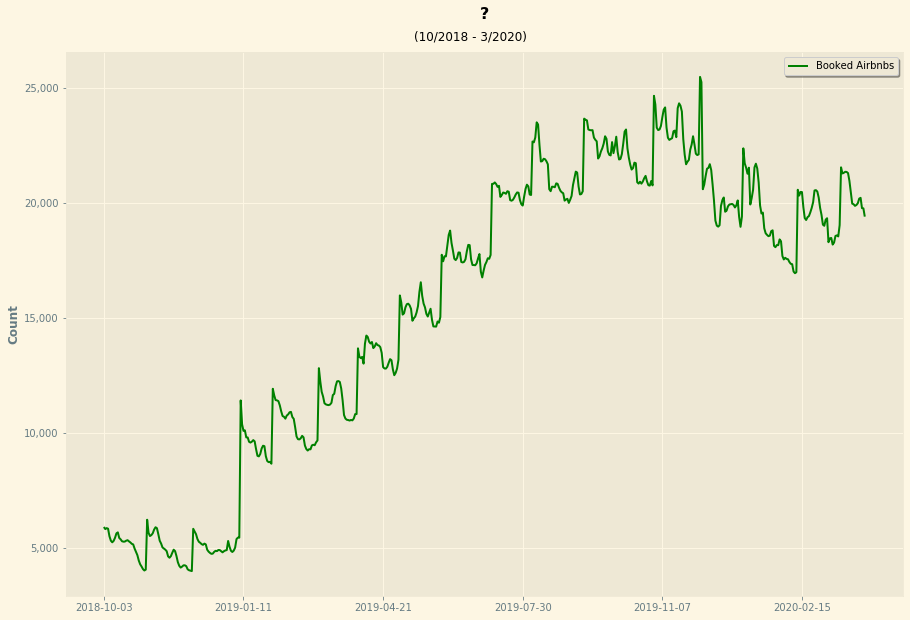

In [31]:
#Set figure size
fig, ax = plt.subplots(figsize = (15,10))
#Visualize airbnbs data
g = bookings_df.plot(y = 'count', ax=ax, color = 'g')

###Set plot Aesthetics###
#Title
ax.set_title('?', fontdict = title_dict, y = 1.05)
plt.suptitle('(10/2018 - 3/2020)', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Labels
ax.set_ylabel('Count', fontdict = label_dict)
ax.set_xlabel('')

#Legend
ax.legend(labels = ['Booked Airbnbs'],frameon = True, shadow = True)

**Decompose Original Time-Series Data**

In [32]:
#Convert index to DateTimeIndex
bookings_df.reset_index(inplace=True)
bookings_df.date = pd.to_datetime(bookings_df.date)
bookings_df.set_index('date', inplace=True)

#Check
display(bookings_df.head())

,count
date,
2018-10-03,5897
2018-10-04,5806
2018-10-05,5847
2018-10-06,5822
2018-10-07,5493


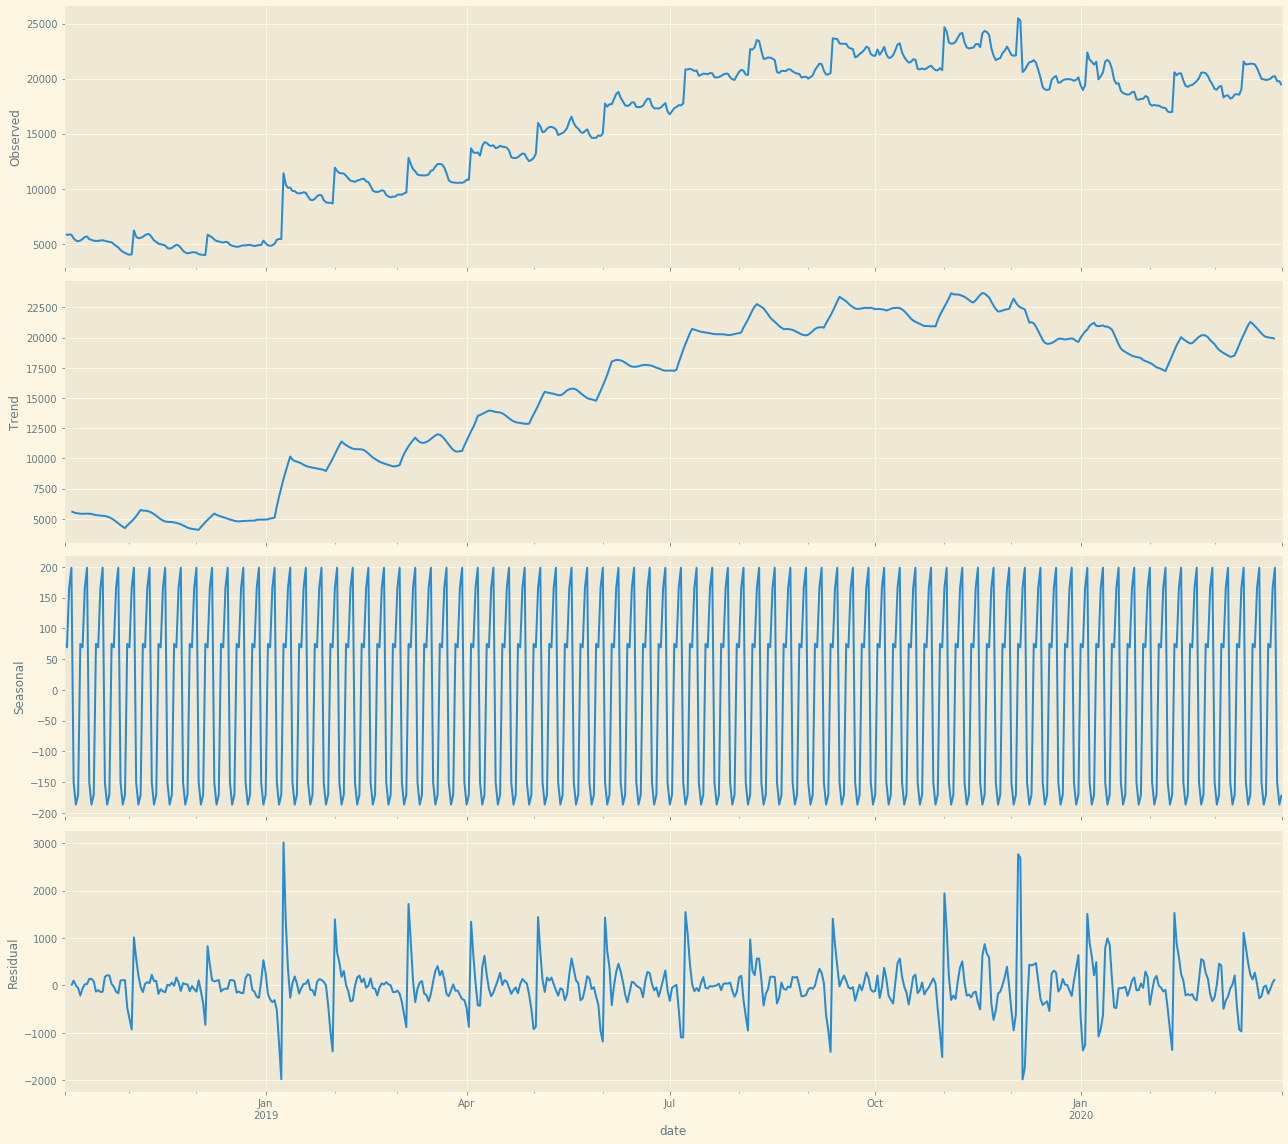

In [39]:
#Read in seasonal decompose model
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 18, 16

#Fit seasonal_decompose to airbnb data
result = seasonal_decompose(bookings_df, model='additive')

#Plot
result.plot();

**Tests for seasonality**

Decompose Original Time-Series Data

In [ ]:
#Read in seasonal decompose model
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
#Fit seasonal_decompose to airbnb data
result = seasonal_decompose(listings_df.loc[listings_df['available'] == 1], model='additive')
result.plot()
plt.show()

In [ ]:
airbnbs.head()

In [ ]:
#Set plot
fig, ax = plt.subplots(figsize=(20,10))

#Set 538 plot style
plt.style.use('fivethirtyeight')

#Store count of booked evenings in Sf per night 
weekly_mean=airbnbs.rolling(window=7,min_periods=7).mean()
biweekly=airbnbs.rolling(window=14,min_periods=7).mean()
monthly=airbnbs.rolling(window=30,min_periods=21).mean()
quarterly=airbnbs.rolling(window=90,min_periods=21).mean()


#PLot count of booked nights per evening
airbnbs.plot(kind = 'line',style='--', linewidth=2,ax=ax)

#Plot rolling average per week
#weekly_mean.plot(label = 'Per Week',linewidth=2,ax=ax)
#biweekly.plot(label = 'Bi-weekly',linewidth=2,ax=ax)
monthly.plot(label = 'Monthly',linewidth=2,ax=ax)
quarterly.plot(linewidth=2,ax=ax)

#Set plot aesthetics
ax.legend(labels = ['Daily Count','Monthly','Quarterly Count'],fancybox = True, frameon=True, shadow = True)
ax.grid(False, axis = 'x')

## Airbnb Growth in SF(12/2016 - 12/2019)?

**Import Libraries**

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Naive Forecasting with moving average

In [ ]:
def MovingAvg_Plot(series, time_window, confidence_intervals = False, scale=1.96,anomalies=False):
    """
    series: time-series data
    time-window: rolling window size
    plot_intervals - show confidence intervals
    anomalies - add anomalies to the plot
    """
    
    rolling_mean = series.rolling(window = time_window).mean()
    
    #Set plot for rolling mean
    plt.figure(figsize=(15,10))
    plt.plot(rolling_mean, label = 'Rolling Mean Trend', linewidth = 1., color ='g')
    plt.title('Moving Average\n Window Size = {}'.format(time_window))
        
    #Plot confidence intervals
    if confidence_intervals:
        mae = mean_absolute_error(series[time_window:], rolling_mean[time_window:])
        deviation = np.std(series[time_window:] - rolling_mean[time_window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond", color = 'black',linewidth = 1)
        plt.plot(lower_bond, "r--", color = 'black', linewidth = 1)
        
    #Find anomalies
    if anomalies:
        anomalies = pd.DataFrame(index = series.index, columns = series.columns)
        anomalies[series<lower_bond] = series[series<lower_bond]
        anomalies[series>upper_bond] = series[series>upper_bond]
        plt.plot(anomalies, 'o', markersize = 5)
        
    #Plot original data
    plt.plot(series[time_window:], label = 'Actual Values',linewidth = 1.)
    plt.legend(loc = 'upper left')


In [ ]:
#Smoothing applied for a week
MovingAvg_Plot(airbnbs, 7, confidence_intervals=True, anomalies=True)

In [ ]:
#Smoothing applied for a month
MovingAvg_Plot(airbnbs, 30, confidence_intervals=True, anomalies=True)

In [ ]:
#Smoothing applied for a quarter
MovingAvg_Plot(airbnbs, 90, confidence_intervals=True, anomalies=True)

These models aren't too bad but let's see if we can improve upon these

### Airbnbn 2020 projections with Prophet

#### Prepare data for Prophet

In [ ]:
#Rest index and rename cols for prophet model
prophet = airbnbs.reset_index()
prophet.rename(columns = {'date': 'ds', 'available_units':'y'}, inplace = True)

In [ ]:
#Init prophet and fit to data
model = fbprophet.Prophet(changepoint_prior_scale=.05)

model.fit(prophet)

In [ ]:
#Make forecast df for Q1 in 2020
future = model.make_future_dataframe(periods=91, freq='D')

#Make predictions
forecast = model.predict(future)

In [ ]:
#View Predictions
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

In [ ]:
#Set plot
fig, ax = plt.subplots(figsize=(20,10))

model.plot(forecast, xlabel='', ylabel='available rental units', ax=ax);

#Set Plot Aeisthetics
ax.set_title('Prophet Projections Through Q1', fontweight = 'bold', fontsize = 28)

In [ ]:
calendar.price.plot()

Apply resampling looking at per night stay in SF

In [ ]:
calendar.head()

In [ ]:
daily_price_summary = pd.DataFrame()
daily_price_summary['price'] = calendar.price.resample('D').mean()

In [ ]:
daily_price_summary.plot(linewidth = 1., title = 'Daily Mean')

In [ ]:
weekly_price_summary = pd.DataFrame()
weekly_price_summary['price'] = calendar.price.resample('W').mean()

In [ ]:
weekly_price_summary.plot(title = 'weekly')

In [ ]:
monthly_price_summary = pd.DataFrame()
monthly_price_summary['price'] = calendar.price.resample('M').mean()

In [ ]:
monthly_price_summary.plot(title = 'Monthly')

Airbnbs in the city available for rent 

In [ ]:
airbnbs.head()

In [ ]:
weekly_airbnb_summary = pd.DataFrame()

weekly_airbnb_summary['count_airbnbs'] = airbnbs.available_units.resample('W').mean()

In [ ]:
weekly_airbnb_summary.plot()

In [ ]:

rcParams['figure.figsize'] = 18, 10
#Fit seasonal_decompose to airbnb data
result = seasonal_decompose(weekly_airbnb_summary, model='additive')
result.plot()
plt.show()

In [ ]:

rcParams['figure.figsize'] = 18, 10
#Fit seasonal_decompose to airbnb data
result = seasonal_decompose(weekly_airbnb_summary, model='multiplicative')
result.plot()
plt.show()